## Observations and Insights 

In [1]:
%matplotlib notebook

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_merge = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Checking the number of mice.
total_mice = len(mouse_data_merge["Mouse ID"].value_counts())

count_mice = pd.DataFrame({"Number of Mice": [total_mice]})
count_mice

,Number of Mice
0,249


In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_merge.loc[mouse_data_merge.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = pd.DataFrame(duplicate_mice)
all_duplicate_mice

,0
0,g989


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_merge[mouse_data_merge['Mouse ID'].isin(duplicate_mice)==False]

In [32]:
# Checking the number of mice in the clean DataFrame.
mice_clean_data = clean_df["Mouse ID"].value_counts()
count_mice_clean = len(mice_clean_data)
count_mice_clean

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_summary = clean_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_mean = data_summary['Tumor Volume (mm3)'].mean()
drug_median = data_summary['Tumor Volume (mm3)'].median()
drug_stdev = data_summary['Tumor Volume (mm3)'].std()
drug_sem = data_summary['Tumor Volume (mm3)'].sem()

data_summary_group_df = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median,
                                     'Standard Deviation': drug_stdev, 'SEM': drug_sem})
data_summary_group_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_summary_stats = data_summary.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
data_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


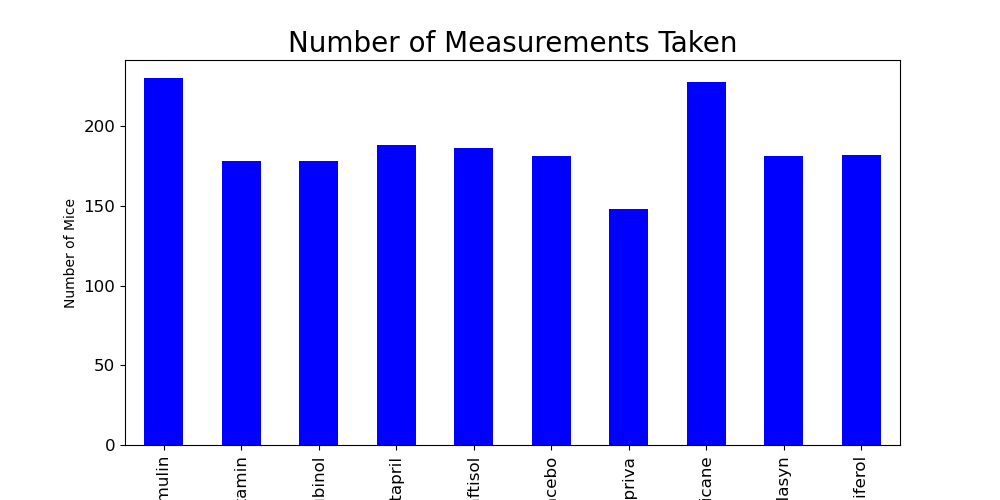

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_measurements = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']
pandas_bar_plot = number_measurements.plot.bar(figsize=(10,5), color='b', fontsize = 12)
pandas_bar_plot
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Measurements Taken",fontsize = 20)

plt.savefig("../images/PandasBarChart.png")
plt.show()
number_measurements

<IPython.core.display.Javascript object>


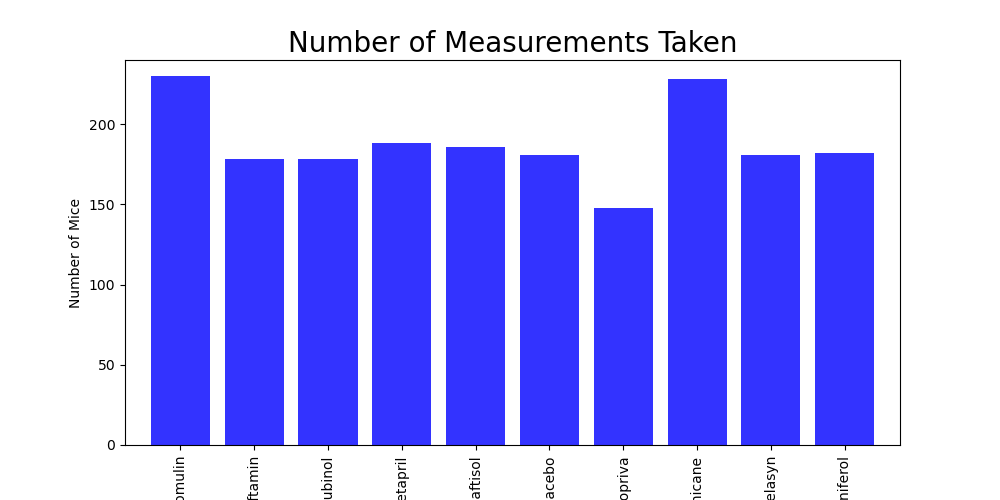

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [50]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#count the number of measurements for each drug 
drug_measurement = (clean_df.groupby(["Drug Regimen"])["Mouse ID"].count())
drug_measurement
#Set x axis
x_axis = np.arange(len(number_measurements))
fig1, ax1 = plt.subplots(figsize=(10,5))
plt.bar(x_axis, drug_measurement, color='b', alpha=0.8, align='center')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_measurement)+10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Measurements Taken",fontsize = 20)

plt.savefig("../images/PypoltBarChart.png")

drug_measurement

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
